In [1]:
!pip install keras_cv_attention_models

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras_cv_attention_models import coatnet

%matplotlib inline

In [3]:
class_num = 12
batch_size = 32
target_size=(200,200)

gen = ImageDataGenerator(rescale=1/255.)
train_gen = gen.flow_from_directory('./data/train/', target_size=target_size, class_mode='categorical', batch_size=batch_size, shuffle=True)
valid_gen = gen.flow_from_directory('./data/valid/', target_size=target_size, class_mode='categorical', batch_size=batch_size, shuffle=True)
test_gen = gen.flow_from_directory('./data/test/', target_size=target_size, class_mode='categorical', batch_size=batch_size, shuffle=True)

Found 36720 images belonging to 12 classes.
Found 12240 images belonging to 12 classes.
Found 12240 images belonging to 12 classes.


In [4]:
transfer_base = coatnet.CoAtNet0(pretrained='imagenet',
                          input_shape=(200, 200, 3))
transfer_base.summary()

>>>> Load pretrained from: /root/.keras/models/coatnet0_224_imagenet.h5
>>>> Reload mismatched weights: 224 -> (200, 200)
>>>> Reload layer: stack_3_block_1_mhsa_pos_emb
>>>> Reload layer: stack_3_block_2_mhsa_pos_emb
>>>> Reload layer: stack_3_block_3_mhsa_pos_emb
>>>> Reload layer: stack_3_block_4_mhsa_pos_emb
>>>> Reload layer: stack_3_block_5_mhsa_pos_emb
>>>> Reload layer: stack_4_block_1_mhsa_pos_emb
>>>> Reload layer: stack_4_block_2_mhsa_pos_emb
Model: "coatnet0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_1_pad (ZeroPadding2D)  

In [5]:
model = models.Sequential()
model.add(transfer_base)
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(class_num, activation='softmax'))
transfer_base.trainable = False
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 coatnet0 (Functional)       (None, 1000)              23285602  
                                                                 
 dense (Dense)               (None, 256)               256256    
                                                                 
 dense_1 (Dense)             (None, 12)                3084      
                                                                 
Total params: 23,544,942
Trainable params: 259,340
Non-trainable params: 23,285,602
_________________________________________________________________


In [6]:
#저장할 모델명(폴더명)
model_name = 'CoAtNet-7_12class'

#폴더생성
if 'save_models' not in os.listdir(): os.mkdir('save_models')
if model_name not in os.listdir('save_models'): os.mkdir('./save_models/{}'.format(model_name))
#모델 저장 path
path_checkpoint = "./save_models/{}/".format(model_name) 
#모델 저장 코드(weight만 저장)
es_callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5, restore_best_weights=True)
modelckpt_callback = tf.keras.callbacks.ModelCheckpoint(monitor="val_loss", filepath=path_checkpoint, verbose=1, save_weights_only=False, save_best_only=True, save_format='tf')

#fit
optimizer = tf.keras.optimizers.Adam(lr=0.0003)
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_gen, validation_data=valid_gen, batch_size=batch_size, epochs=5, callbacks=[es_callback, modelckpt_callback])

Epoch 1/5


/root/anaconda3/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1148/1148 [==============================] - ETA: 0s - loss: 1.8612 - accuracy: 0.5254
Epoch 1: val_loss improved from inf to 1.44535, saving model to ./save_models/CoAtNet-7_12class/


INFO:tensorflow:Assets written to: ./save_models/CoAtNet-7_12class/assets


INFO:tensorflow:Assets written to: ./save_models/CoAtNet-7_12class/assets


1148/1148 [==============================] - 3410s 3s/step - loss: 1.8612 - accuracy: 0.5254 - val_loss: 1.4453 - val_accuracy: 0.5847
Epoch 2/5
1148/1148 [==============================] - ETA: 0s - loss: 1.2604 - accuracy: 0.6376
Epoch 2: val_loss improved from 1.44535 to 1.20839, saving model to ./save_models/CoAtNet-7_12class/


INFO:tensorflow:Assets written to: ./save_models/CoAtNet-7_12class/assets


INFO:tensorflow:Assets written to: ./save_models/CoAtNet-7_12class/assets


1148/1148 [==============================] - 3361s 3s/step - loss: 1.2604 - accuracy: 0.6376 - val_loss: 1.2084 - val_accuracy: 0.6363
Epoch 3/5
1148/1148 [==============================] - ETA: 0s - loss: 1.0640 - accuracy: 0.6846
Epoch 3: val_loss improved from 1.20839 to 1.09877, saving model to ./save_models/CoAtNet-7_12class/


INFO:tensorflow:Assets written to: ./save_models/CoAtNet-7_12class/assets


INFO:tensorflow:Assets written to: ./save_models/CoAtNet-7_12class/assets


1148/1148 [==============================] - 3341s 3s/step - loss: 1.0640 - accuracy: 0.6846 - val_loss: 1.0988 - val_accuracy: 0.6634
Epoch 4/5
1148/1148 [==============================] - ETA: 0s - loss: 0.9524 - accuracy: 0.7118
Epoch 4: val_loss improved from 1.09877 to 1.03410, saving model to ./save_models/CoAtNet-7_12class/


INFO:tensorflow:Assets written to: ./save_models/CoAtNet-7_12class/assets


INFO:tensorflow:Assets written to: ./save_models/CoAtNet-7_12class/assets


1148/1148 [==============================] - 3357s 3s/step - loss: 0.9524 - accuracy: 0.7118 - val_loss: 1.0341 - val_accuracy: 0.6827
Epoch 5/5
1148/1148 [==============================] - ETA: 0s - loss: 0.8748 - accuracy: 0.7341
Epoch 5: val_loss improved from 1.03410 to 0.98625, saving model to ./save_models/CoAtNet-7_12class/


INFO:tensorflow:Assets written to: ./save_models/CoAtNet-7_12class/assets


INFO:tensorflow:Assets written to: ./save_models/CoAtNet-7_12class/assets


1148/1148 [==============================] - 3356s 3s/step - loss: 0.8748 - accuracy: 0.7341 - val_loss: 0.9863 - val_accuracy: 0.7031


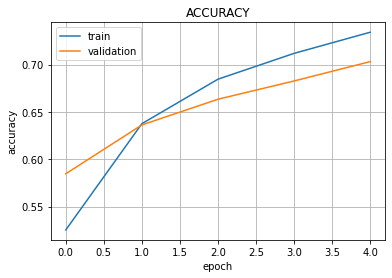

In [7]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('ACCURACY')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.grid()
plt.legend(['train','validation'], loc = 'best')

In [8]:
#저장된 최고 성능 모델 불러오기
model_loaded = tf.keras.models.load_model(path_checkpoint)

#test score 확인
score = model_loaded.evaluate(test_gen) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

383/383 [==============================] - 839s 2s/step - loss: 0.9692 - accuracy: 0.7038
Test loss: 0.9692303538322449
Test accuracy: 0.703839898109436
